In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Tax.csv')
df

,user_country,source,content,date
0,"New York City, USA",Twitter Web App,@WildPalmsLtd But it goes way beyond the lopsi...,2020-09-29T23:59:59+00:00
1,NaN,Twitter for iPhone,@CRNC Blue collar guys pay their taxes.,2020-09-29T23:59:59+00:00
2,"Lincoln City, OR",Twitter for iPad,@IngrahamAngle And your guy is a drug addled m...,2020-09-29T23:59:59+00:00
3,"Fontana, CA (Tongva/Kizh land)",Twitter for iPhone,@GPravednikov @LiamOMaraIV There IS an effect ...,2020-09-29T23:59:59+00:00
4,Phoenix,Twitter Web App,@betterformykids @ProjectLincoln @realDonaldTr...,2020-09-29T23:59:59+00:00
...,...,...,...,...
1995,NaN,Twitter Web App,@ReckoningTruth @JoeBiden @realDonaldTrump @Ge...,2020-09-29T23:52:20+00:00
1996,heaven soon,Twitter Web App,@dbongino So low took an old mans only way to ...,2020-09-29T23:52:19+00:00
1997,Baltimore MD Citizen 2012,Twitter Web App,@SteveGuest He pulled it outta donnie's $70000...,2020-09-29T23:52:19+00:00
1998,"Illinois, USA",Twitter for Android,"@dougcrisp2 Hey @EAUKnews @Evangelical , did y...",2020-09-29T23:52:19+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

63681
['@wildpalmsltd', 'but', 'it', 'goes', 'way', 'beyond', 'the', 'lopsided', '&', 'unfair', 'tax', 'system', '.', 'trump', 'is', 'about', 'tax', 'fraud', ',', 'bank']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 167.96%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

26775
['goes', 'way', 'beyond', 'lopsided', 'unfair', 'tax', 'system', 'trump', 'tax', 'fraud', 'bank', 'fraud', 'insurance', 'fraud', 'money', 'laundering', "he's", 'stone', 'cold', 'crook']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 174),
 ('@joebiden', 173),
 ('@ilhan', 65),
 ('@crnc', 41),
 ('@aoc', 39),
 ('@steveguest', 36),
 ('@speakerpelosi', 34),
 ('@kamalaharris', 31),
 ('@mitchellreports', 28),
 ('@senschumer', 25),
 ('@donaldjtrumpjr', 23),
 ('@sentedcruz', 19),
 ('@jim_jordan', 18),
 ('@thejtlewis', 17),
 ('@real_defender', 16),
 ('@cnn', 16),
 ('@ingrahamangle', 15),
 ('@anncoulter', 15),
 ('@realjameswoods', 15),
 ('@erictrump', 15)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"New York City, USA",Twitter Web App,@WildPalmsLtd But it goes way beyond the lopsi...,2020-09-29T23:59:59+00:00,Negative
1,NaN,Twitter for iPhone,@CRNC Blue collar guys pay their taxes.,2020-09-29T23:59:59+00:00,Neutral
2,"Lincoln City, OR",Twitter for iPad,@IngrahamAngle And your guy is a drug addled m...,2020-09-29T23:59:59+00:00,Negative
3,"Fontana, CA (Tongva/Kizh land)",Twitter for iPhone,@GPravednikov @LiamOMaraIV There IS an effect ...,2020-09-29T23:59:59+00:00,Positive
4,Phoenix,Twitter Web App,@betterformykids @ProjectLincoln @realDonaldTr...,2020-09-29T23:59:59+00:00,Negative
...,...,...,...,...,...
1995,NaN,Twitter Web App,@ReckoningTruth @JoeBiden @realDonaldTrump @Ge...,2020-09-29T23:52:20+00:00,Negative
1996,heaven soon,Twitter Web App,@dbongino So low took an old mans only way to ...,2020-09-29T23:52:19+00:00,Negative
1997,Baltimore MD Citizen 2012,Twitter Web App,@SteveGuest He pulled it outta donnie's $70000...,2020-09-29T23:52:19+00:00,Negative
1998,"Illinois, USA",Twitter for Android,"@dougcrisp2 Hey @EAUKnews @Evangelical , did y...",2020-09-29T23:52:19+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    925
Neutral     581
Negative    494
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 46.25%
Percentage of neutral tweets: 29.05%
Percentage of negative tweets: 24.70%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

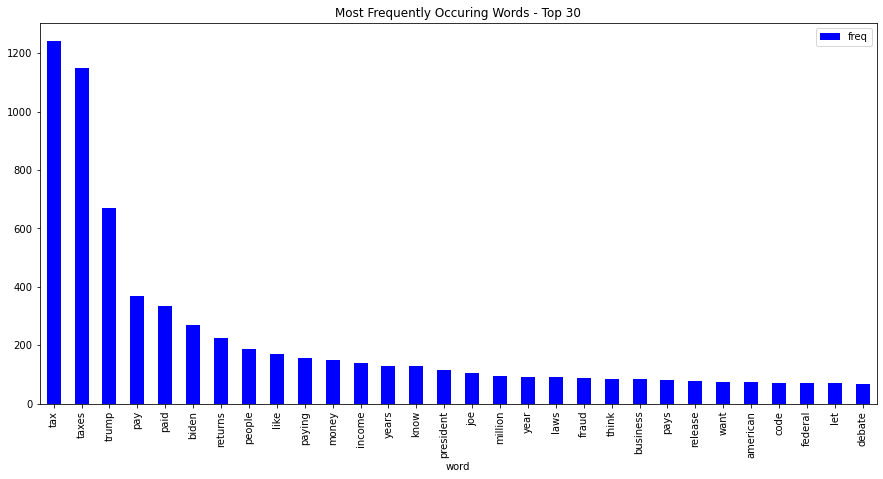

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

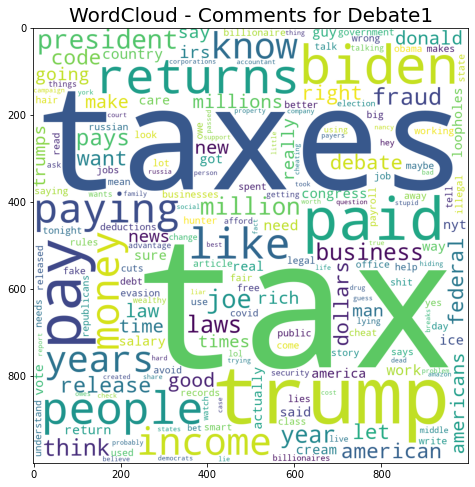

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

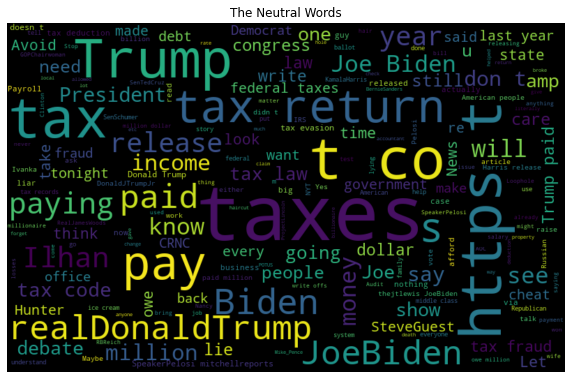

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

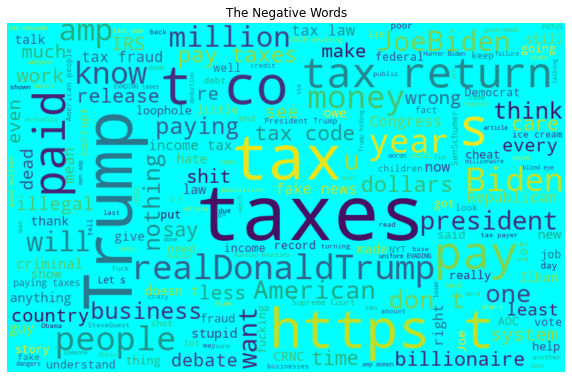

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

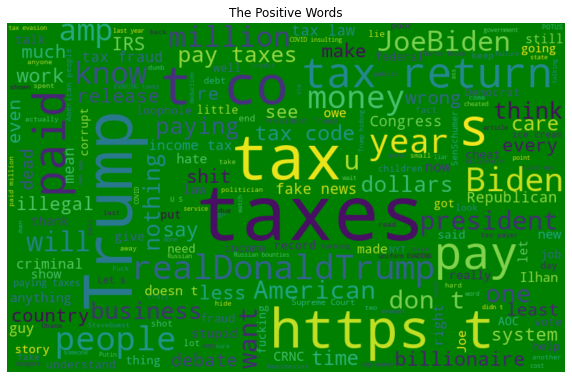

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@WildPalmsLtd But it goes way beyond the lopsi...,Negative
1,@CRNC Blue collar guys pay their taxes.,Neutral
2,@IngrahamAngle And your guy is a drug addled m...,Negative
3,@GPravednikov @LiamOMaraIV There IS an effect ...,Positive
4,@betterformykids @ProjectLincoln @realDonaldTr...,Negative
...,...,...
1995,@ReckoningTruth @JoeBiden @realDonaldTrump @Ge...,Negative
1996,@dbongino So low took an old mans only way to ...,Negative
1997,@SteveGuest He pulled it outta donnie's $70000...,Negative
1998,"@dougcrisp2 Hey @EAUKnews @Evangelical , did y...",Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Negative,but it goes way beyond the lopsided unfair tax...
1,Neutral,blue collar guys pay their taxes
2,Negative,and your guy is a drug addled mob boss who com...
3,Positive,there is an effect with too much money printed...
4,Negative,he clearly closed loopholes on the federal tax...
...,...,...
1995,Negative,nd round of help nj is still waiting for the s...
1996,Negative,so low took an old mans only way to make a liv...
1997,Negative,he pulled it outta donnie s hair good grief y ...
1998,Positive,hey did you hear is a strong christian i m not...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
3,Positive,there is an effect with too much money printed...
6,Positive,at least biden isn t a serial liar or fine wit...
7,Positive,glad you think that being a tax cheat is funny
8,Positive,laura get a new game the president of the unit...
10,Positive,undocumented immigrants commit crimes at tiny ...
...,...,...
1990,Negative,i bet that if this was biden s tax returns y a...
1995,Negative,nd round of help nj is still waiting for the s...
1996,Negative,so low took an old mans only way to make a liv...
1997,Negative,he pulled it outta donnie s hair good grief y ...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
3,1,there is an effect with too much money printed...
6,1,at least biden isn t a serial liar or fine wit...
7,1,glad you think that being a tax cheat is funny
8,1,laura get a new game the president of the unit...
10,1,undocumented immigrants commit crimes at tiny ...
...,...,...
1990,0,i bet that if this was biden s tax returns y a...
1995,0,nd round of help nj is still waiting for the s...
1996,0,so low took an old mans only way to make a liv...
1997,0,he pulled it outta donnie s hair good grief y ...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1064, 2)
(355, 2)


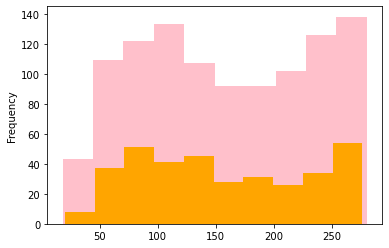

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(421490, 641200)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('via', 0.7236232161521912),
 ('bombshell', 0.6697490215301514),
 ('cnn', 0.6671261191368103),
 ('mr', 0.6663284301757812),
 ('eric', 0.6654133200645447),
 ('kept', 0.6570392847061157),
 ('campaign', 0.6535534262657166),
 ('donald', 0.6515587568283081),
 ('releases', 0.6501569747924805),
 ('rolling', 0.6484811902046204)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('by', -0.3035006523132324),
 ('at', -0.3120076060295105),
 ('be', -0.31758928298950195),
 ('fraud', -0.3372783660888672),
 ('as', -0.33903768658638),
 ('old', -0.3426813781261444),
 ('system', -0.3475933074951172),
 ('new', -0.34788691997528076),
 ('up', -0.3501015901565552),
 ('of', -0.35308635234832764)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1064, 500)
(1064,)
(355, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5014084507042254
F1 score : 0.49572649572649574
[[ 91  43]
 [134  87]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9962406015037594
Validation Accuracy : 0.5380281690140845
f1 score : 0.5751295336787564
[[ 80  54]
 [110 111]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.476056338028169
f1 score : 0.4945652173913044
[[ 78  56]
 [130  91]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9238721804511278
Validation Accuracy : 0.6225352112676056
f1 score : 0.7649122807017543
[[  3 131]
 [  3 218]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 even if you give a very generous benefit of the doubt that his taxes are legitimate then you must conclude he s absolutely incompetent at making money in business nobody loses that much money in consecutive years 

First sample after preprocessing: 
 [112  29   8 163   6 185  10   1  13  19   4  23  91   8 335  11   9 421
  60 289  55   7  76 305  13  74  55   7  66   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
8/8 - 1s - loss: 0.6530 - accuracy: 0.6614 - val_loss: 0.6364 - val_accuracy: 0.6636
Epoch 2/20
8/8 - 1s - loss: 0.6411 - accuracy: 0.6614 - val_loss: 0.6373 - val_accuracy: 0.6636
Epoch 3/20
8/8 - 1s - loss: 0.6337 - accuracy: 0.6614 - val_loss: 0.6354 - val_accuracy: 0.6636
Epoch 4/20
8/8 - 1s - loss: 0.6261 - accuracy: 0.6614 - val_loss: 0.6296 - val_accuracy: 0.6636
Epoch 5/20
8/8 - 1s - loss: 0.6146 - accuracy: 0.6614 - val_loss: 0.6219 - val_accuracy: 0.6636
Epoch 6/20
8/8 - 1s - loss: 0.5914 - accuracy: 0.6614 - val_loss: 0.6093 - val_accuracy: 0.6636
Epoch 7/20
8/8 - 1s - loss: 0.5523 - accuracy: 0.6646 - val_loss: 0.5944 - val_accuracy: 0.6542
Epoch 8/20
8/8 - 1s - loss: 0.5053 - accuracy: 0.7356 - val_loss: 0.5865 - val_accuracy: 0.7009
Epoch 9/20
8/8 - 1s - loss: 0.4581 - accuracy: 0.8098 - val_loss: 0.5863 - val_accuracy: 0.7009
Epoch 10/20
8/8 - 1s - loss: 0.3878 - accuracy: 0.8464 - val_loss: 0.6099 - val_accuracy: 0.7103
Epoch 11/20
8/8 - 1s - loss: 0.3343 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,0,but it goes way beyond the lopsided unfair tax...
1,-1,blue collar guys pay their taxes
2,0,and your guy is a drug addled mob boss who com...
3,1,there is an effect with too much money printed...
4,0,he clearly closed loopholes on the federal tax...
...,...,...
1995,0,nd round of help nj is still waiting for the s...
1996,0,so low took an old mans only way to make a liv...
1997,0,he pulled it outta donnie s hair good grief y ...
1998,1,hey did you hear is a strong christian i m not...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.464
F1 score : [0.34632035 0.08187135 0.6187291 ]
[[ 40  10  85]
 [ 30   7 101]
 [ 26  16 185]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9153333333333333
Validation Accuracy : 0.436
f1 score : [0.32075472 0.27838828 0.56699029]
[[ 34  36  65]
 [ 23  38  77]
 [ 20  61 146]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.336
f1 score : [0.27272727 0.23129252 0.45238095]
[[39 57 39]
 [45 34 59]
 [67 65 95]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.838
Validation Accuracy : 0.512
f1 score : [0.49230769 0.         0.63893511]
[[ 64   0  71]
 [ 27   0 111]
 [ 34   1 192]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 2, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['i m upset with the tax laws trump continues to use too particularly because he promised to eliminate the loopholes that would benefit him', 'hey donald trump i don t care about hunter biden i want to talk about dead on your watch the children you put in cages the russian bounties on u s soldiers and the dollars you paid in taxes', 'it s just all a distraction again the american government knew who he is was last election the people voted for clinton the seats voted for trump and he won there s a bigger picture here there s more people can be doing rather just talking about his taxes', 'bro your yearly salary is figures yet youre worth million our president actually owes nothing in back taxes due to tax loopholes perfectly legal not a question of national security especially seeing how he has nothing from russia no gains from public office try again', 'yes indirectly financing treatment of neighbour s necessary medical conditions through tax etc is

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5826 - accuracy: 0.2370 - val_loss: 0.3316 - val_accuracy: 0.2533
Epoch 2/20
11/11 - 2s - loss: 0.4792 - accuracy: 0.2356 - val_loss: 0.3251 - val_accuracy: 0.2533
Epoch 3/20
11/11 - 2s - loss: 0.4712 - accuracy: 0.2356 - val_loss: 0.3215 - val_accuracy: 0.2533
Epoch 4/20
11/11 - 2s - loss: 0.4508 - accuracy: 0.2356 - val_loss: 0.3127 - val_accuracy: 0.2533
Epoch 5/20
11/11 - 2s - loss: 0.4111 - accuracy: 0.2356 - val_loss: 0.2564 - val_accuracy: 0.2533
Epoch 6/20
11/11 - 2s - loss: 0.2692 - accuracy: 0.2356 - val_loss: 0.1502 - val_accuracy: 0.2600
Epoch 7/20
11/11 - 2s - loss: -5.5925e-02 - accuracy: 0.2481 - val_loss: -4.5507e-01 - val_accuracy: 0.3200
Epoch 8/20
11/11 - 2s - loss: -7.7746e-01 - accuracy: 0.3807 - val_loss: -1.6061e+00 - val_accuracy: 0.3467
Epoch 9/20
11/11 - 2s - loss: -2.1886e+00 - accuracy: 0.3896 - val_loss: -3.2999e+00 - val_accuracy: 0.3867
Epoch 10/20
11/11 - 2s - loss: -5.1680e+00 - accuracy: 0.4363 - val_loss: -7.3357e+00 - 